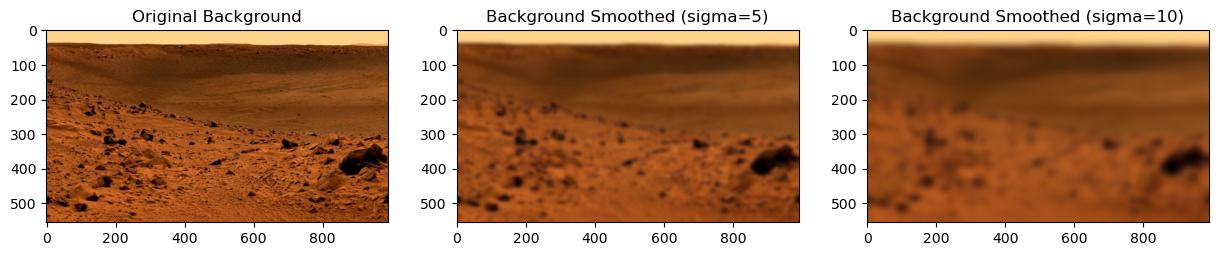

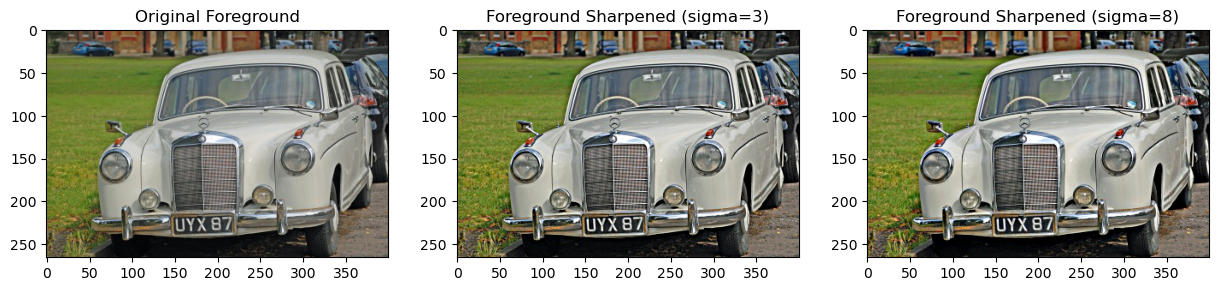

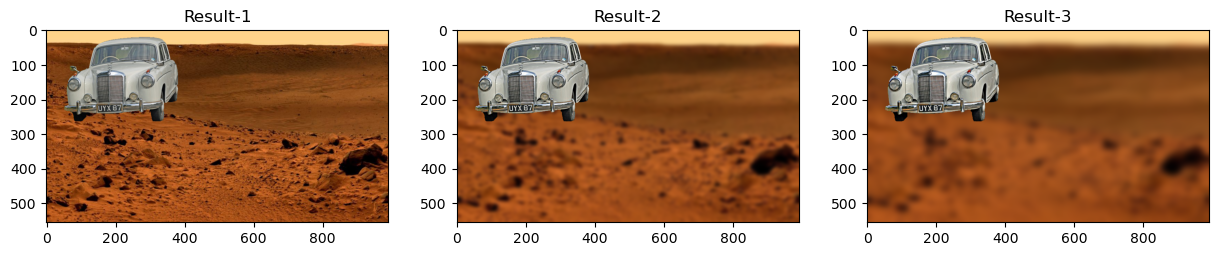

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def combineForegroundBackground(fgImg, fgMask, bgImg, topLeft):
    # To take the dimensions of foreground and mask
    fgHeight, fgWidth, _ = fgImg.shape

    # To take the dimensions of the background
    bgHeight, bgWidth, _ = bgImg.shape

    # Calculate the bottom right corner of the foreground image in the background image
    fgBottomRight = (topLeft[0] + fgWidth, topLeft[1] + fgHeight)

    # For adjusting the foreground to the background 
    for y in range(topLeft[1], fgBottomRight[1]):
        for x in range(topLeft[0], fgBottomRight[0]):
            
             # We are checking if the foreground object is in the bounds of the background
            if x >= 0 and y >= 0 and x < bgWidth and y < bgHeight:
                # Get the foreground and mask to the corresponding pixels
                fgPixel = fgImg[y - topLeft[1], x - topLeft[0]]
                fgMaskPixel = fgMask[y - topLeft[1], x - topLeft[0]]

                # Check if the pixel belongs to the foreground object
                if fgMaskPixel > 0:
                    # Update the pixel in the background image with the pixel from the foreground image
                    bgImg[y, x] = fgPixel

    return bgImg


def gaussianSmoothing(img, sigma):
    #The function performs a Gaussian smoothing operation
    #on the input image using Gaussian kernel with sigma value.
    #The output of the function is the smoothed image.
    
    ksize = int(6 * sigma)
    if ksize % 2 == 0:
        ksize += 1
    kernel = cv2.getGaussianKernel(ksize, sigma)  
    smoothed = cv2.sepFilter2D(img, -1, kernel, kernel) 
    
    return smoothed

def unsharpMasking(img, sigma):
    #The function performs a unsharp masking operation
    #on the input image using Gaussian kernel with sigma value.
    #The output of the function is the sharpened image.
    
    blurred = gaussianSmoothing(img, sigma)
    unsharp = cv2.addWeighted(img, 1.5, blurred, -0.5, 0)
    return unsharp

background = cv2.imread('mars.jpeg')


foreground = cv2.imread('0431.jpg')



# Apply gaussianSmoothing function for sigma = 5 and sigma = 10
bg_smoothed_5 = gaussianSmoothing(background, 5)
bg_smoothed_10 = gaussianSmoothing(background, 10)


# Show the results as plots
fig, axs = plt.subplots(1, 3, figsize=(15, 10))
axs[0].imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Background')
axs[1].imshow(cv2.cvtColor(bg_smoothed_5, cv2.COLOR_BGR2RGB))
axs[1].set_title('Background Smoothed (sigma=5)')
axs[2].imshow(cv2.cvtColor(bg_smoothed_10, cv2.COLOR_BGR2RGB))
axs[2].set_title('Background Smoothed (sigma=10)')
plt.show()

# Apply unsharpMasking function for sigma = 3 and sigma = 8
fg_sharpened_3 = unsharpMasking(foreground, 3)
fg_sharpened_8 = unsharpMasking(foreground, 8)



# Show the results as plots
fig, axs = plt.subplots(1, 3, figsize=(15, 10))
axs[0].imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Foreground')
axs[1].imshow(cv2.cvtColor(fg_sharpened_3, cv2.COLOR_BGR2RGB))
axs[1].set_title('Foreground Sharpened (sigma=3)')
axs[2].imshow(cv2.cvtColor(fg_sharpened_8, cv2.COLOR_BGR2RGB))
axs[2].set_title('Foreground Sharpened (sigma=8)')
plt.show()

fgImg = cv2.imread('0431.jpg')
fgMask = cv2.imread('mask0431.png', 0)
bgImg = cv2.imread('mars.jpeg')

# Convert foreground image and background image to RGB
fgImg = cv2.cvtColor(fgImg, cv2.COLOR_BGR2RGB)
bgImg = cv2.cvtColor(bgImg, cv2.COLOR_BGR2RGB)
topLeft= (0, 0) 

result1 = combineForegroundBackground(foreground, fgMask, background, topLeft)

foreground=fg_sharpened_3
background=bg_smoothed_5
result2 = combineForegroundBackground(fg_sharpened_3, fgMask, bg_smoothed_5, topLeft)
foreground=fg_sharpened_8
background=bg_smoothed_10
result3 = combineForegroundBackground(fg_sharpened_8, fgMask, bg_smoothed_10, topLeft)



fig, axs = plt.subplots(1, 3, figsize=(15, 10))
axs[0].imshow(cv2.cvtColor(result1, cv2.COLOR_BGR2RGB))
axs[0].set_title('Result-1')
axs[1].imshow(cv2.cvtColor(result2, cv2.COLOR_BGR2RGB))
axs[1].set_title('Result-2')
axs[2].imshow(cv2.cvtColor(result3, cv2.COLOR_BGR2RGB))
axs[2].set_title('Result-3')
plt.show()
